In [1]:
# A small scale analysis of Creative Assembly's recent performance and game retention.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

finances = pd.read_csv("basic_ca_finances.csv")

In [3]:
finances.head()

,Year,Revenue,Gross_Profit,After-Tax_Profit,Admin_Expense,Employees,Employee_Cost,Net_Assets
0,2019,67140671,10776558,9755580,5333380,404,23494656,29727307
1,2020,90497255,11994260,8237879,5510570,480,30691450,37965186
2,2021,114678250,17462076,9095911,11979839,588,38656052,47061097
3,2022,137127275,21579675,6857879,14795023,663,43643066,53918976


In [4]:
df_fin = pd.DataFrame(finances)

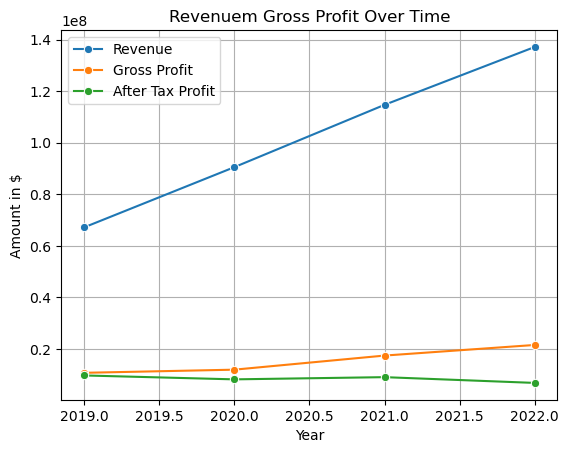

In [5]:
sns.lineplot(data=df_fin, x='Year', y='Revenue', marker="o", label='Revenue')
sns.lineplot(data=df_fin, x='Year', y='Gross_Profit', marker="o", label='Gross Profit')
sns.lineplot(data=df_fin, x='Year', y='After-Tax_Profit', marker="o", label='After Tax Profit')

plt.title("Revenuem Gross Profit Over Time")
plt.ylabel("Amount in $")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
df_fin['Net_Profit_Margin'] = (df_fin['After-Tax_Profit'] / df_fin['Revenue']) * 100

In [7]:
df_fin.head()

,Year,Revenue,Gross_Profit,After-Tax_Profit,Admin_Expense,Employees,Employee_Cost,Net_Assets,Net_Profit_Margin
0,2019,67140671,10776558,9755580,5333380,404,23494656,29727307,14.530060
1,2020,90497255,11994260,8237879,5510570,480,30691450,37965186,9.102905
2,2021,114678250,17462076,9095911,11979839,588,38656052,47061097,7.931679
3,2022,137127275,21579675,6857879,14795023,663,43643066,53918976,5.001105


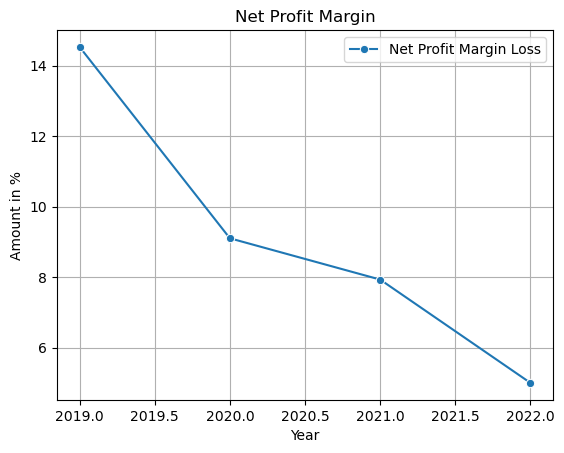

In [8]:
sns.lineplot(data=df_fin, x='Year', y='Net_Profit_Margin', marker="o", label='Net Profit Margin Loss')

plt.title("Net Profit Margin")
plt.ylabel("Amount in %")
plt.grid(True)
plt.legend()
plt.show()

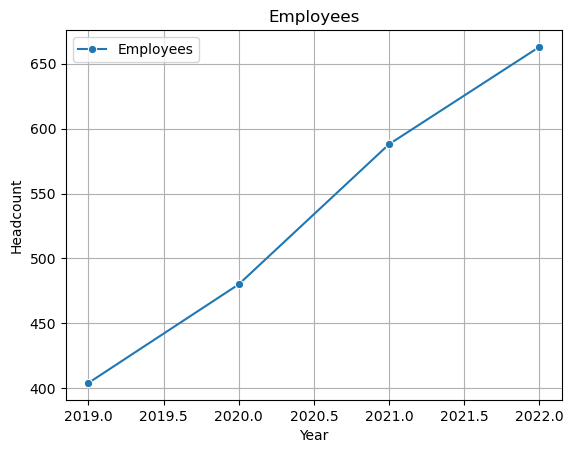

In [9]:
sns.lineplot(data=df_fin, x='Year', y='Employees', marker="o", label='Employees')

plt.title("Employees")
plt.ylabel("Headcount")
plt.grid(True)
plt.legend()
plt.show()

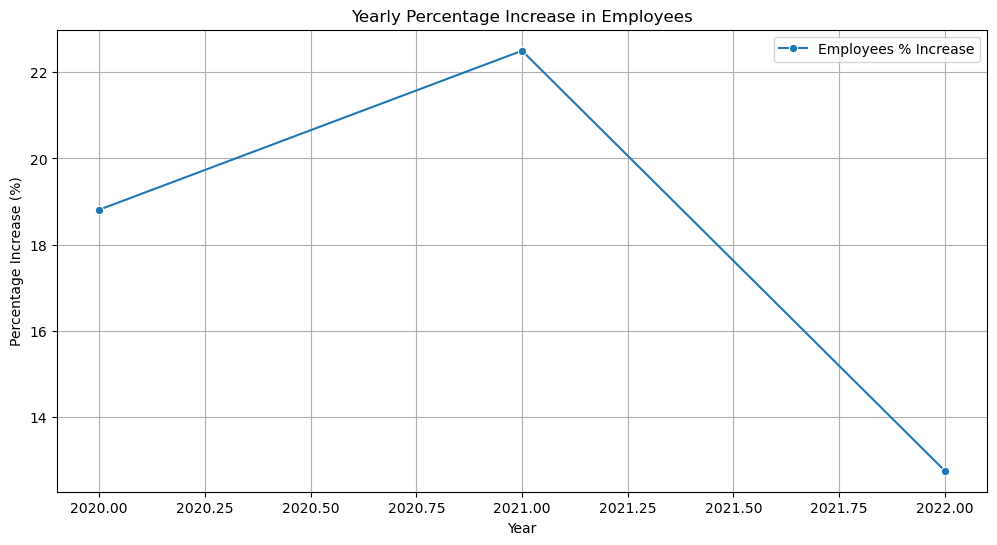

In [10]:
df_fin['Employees_Percent_Increase'] = df_fin['Employees'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fin, x='Year', y='Employees_Percent_Increase', marker="o", label='Employees % Increase')

plt.title("Yearly Percentage Increase in Employees")
plt.ylabel("Percentage Increase (%)")
plt.grid(True)
plt.legend()
plt.show()

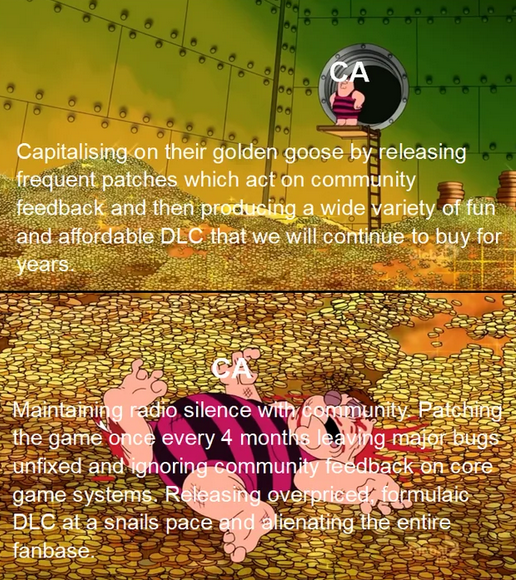

In [11]:
display(Image(filename='ca.png'))

In [12]:
# Creative Assembly have also decided to pour more money and resources into their new Fortnite clone, Hyenas. 
# While also having the time to break Shogun 2 mod compatability and remove their chat function from the majority of the older releases.
# With all that said, lets move on to game retention!

In [13]:
gameretention = pd.read_csv("basic_ca_gamecount.csv")

In [14]:
gameretention.head(11)

,Game,24hr_Peak,All-Time_Peak
0,Total War: WARHAMMER III,17843,166754
1,Total War: THREE KINGDOMS,7997,192298
2,Total War: ROME II - Emperor Edition,5662,118240
3,Total War: MEDIEVAL II - Definitive Edition,4282,8453
4,Total War: WARHAMMER II,3276,84920
5,Total War: EMPIRE - Definitive Edition,3021,27559
6,Total War: ATTILA,2377,26346
7,Total War: NAPOLEON - Definitive Edition,1569,9935
8,Total War: ROME REMASTERED,585,18526
9,Rome: Total War,502,4413


In [15]:
df_game = pd.DataFrame(gameretention)

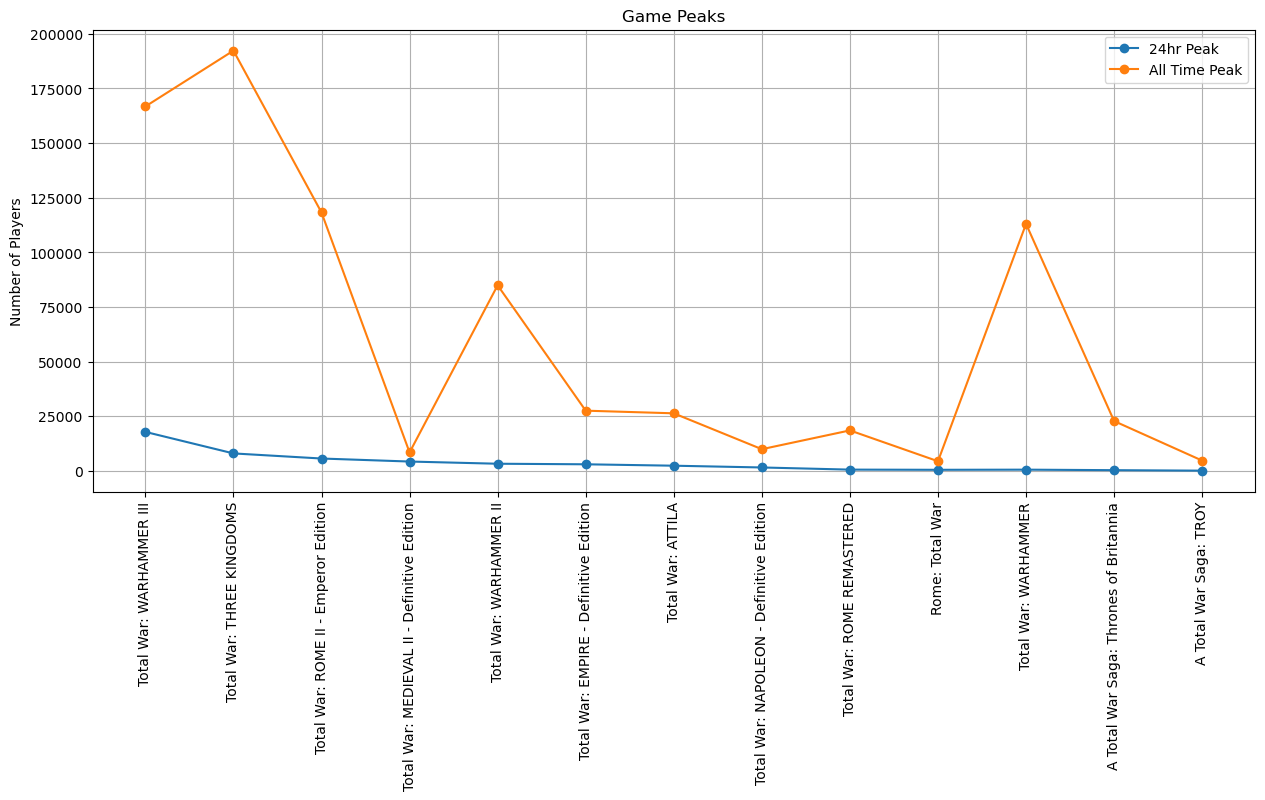

In [16]:
plt.figure(figsize=(15, 6))

plt.plot(df_game['Game'], df_game['24hr_Peak'], marker='o', label='24hr Peak')

plt.plot(df_game['Game'], df_game['All-Time_Peak'], marker='o', label='All Time Peak')
plt.xticks(rotation=90)


plt.title('Game Peaks')
plt.ylabel('Number of Players')
plt.grid(True)
plt.legend()
plt.show()


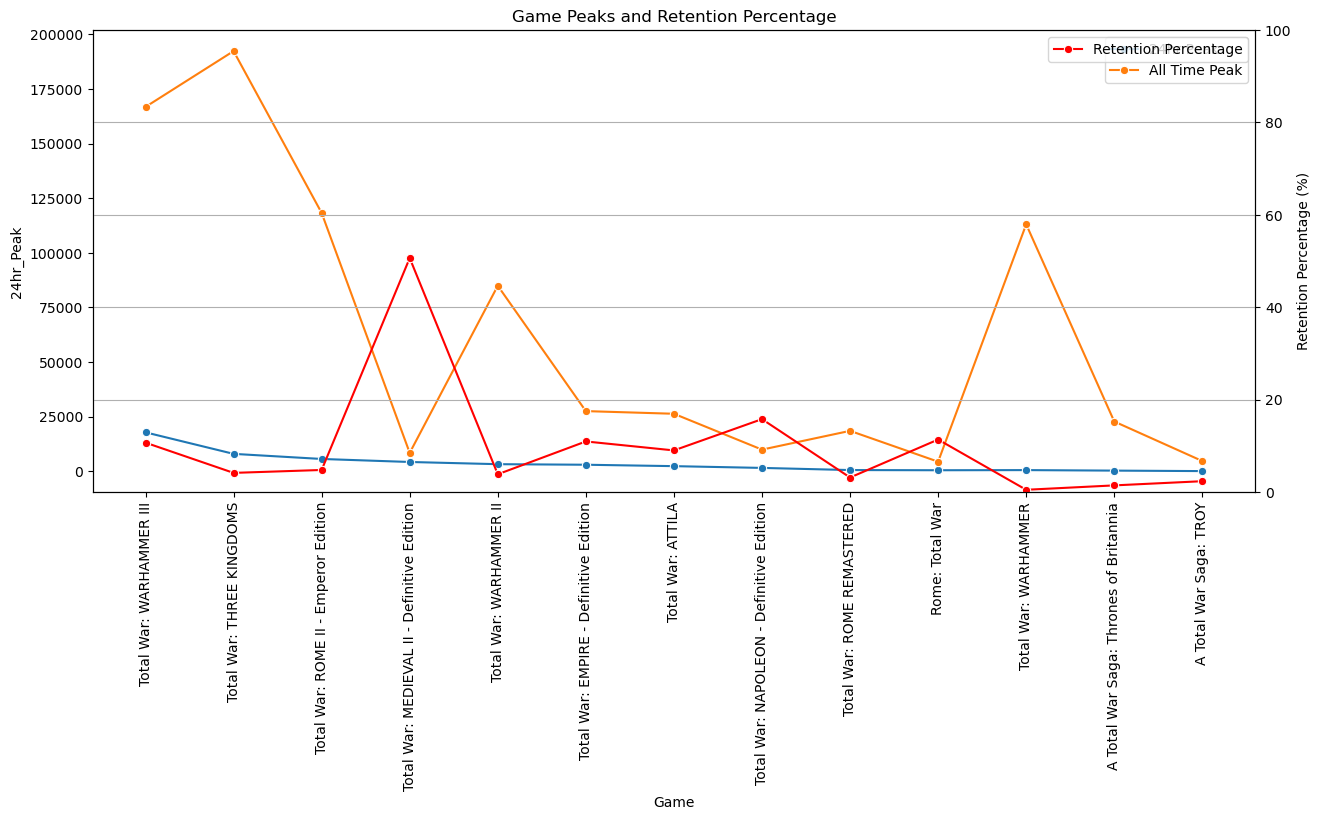

In [17]:
df_game['retention_percentage'] = (df_game['24hr_Peak'] / df_game['All-Time_Peak']) * 100

# Plotting
plt.figure(figsize=(15, 6))

# Plotting 24hr peak
sns.lineplot(data=df_game, x='Game', y='24hr_Peak', marker='o', label='24hr Peak')
plt.xticks(rotation=90)


# Plotting all-time peak
sns.lineplot(data=df_game, x='Game', y='All-Time_Peak', marker='o', label='All Time Peak')

# Plotting retention percentage on a secondary y-axis
ax2 = plt.gca().twinx()
sns.lineplot(data=df_game, x='Game', y='retention_percentage', marker='o', ax=ax2, color='red', label='Retention Percentage')
ax2.set_ylabel('Retention Percentage (%)')
ax2.set_ylim(0, 100)  # Assuming percentage is between 0 and 100

plt.title('Game Peaks and Retention Percentage')
plt.grid(True)
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [18]:
df_game.head(11)

,Game,24hr_Peak,All-Time_Peak,retention_percentage
0,Total War: WARHAMMER III,17843,166754,10.700193
1,Total War: THREE KINGDOMS,7997,192298,4.158650
2,Total War: ROME II - Emperor Edition,5662,118240,4.788566
3,Total War: MEDIEVAL II - Definitive Edition,4282,8453,50.656572
4,Total War: WARHAMMER II,3276,84920,3.857748
5,Total War: EMPIRE - Definitive Edition,3021,27559,10.961936
6,Total War: ATTILA,2377,26346,9.022242
7,Total War: NAPOLEON - Definitive Edition,1569,9935,15.792652
8,Total War: ROME REMASTERED,585,18526,3.157724
9,Rome: Total War,502,4413,11.375482


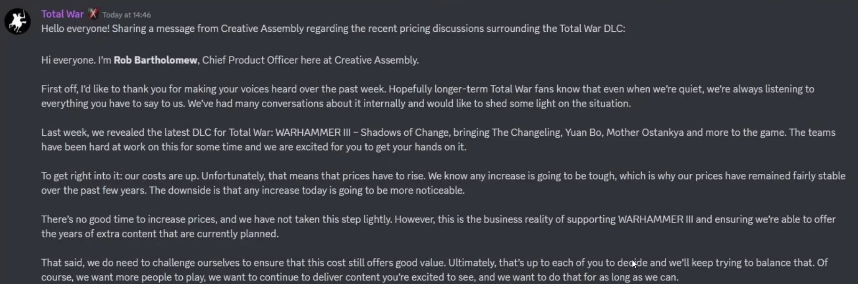

In [19]:
display(Image(filename='ca_discord.png'))